# 계획
 - 우선 Cut off 나는 부분은 그 아래 데이터 없애버리기
 - 그 뒤에 남은데이터로 Interpolate 시키고 그 아래로 Te가 들어가면 일정한 값 뱉게 만들기 (1e-28같이 낮은값 or 0으로 고정)
 - rate constant interpolate 전략 먹히면 xs analytic으로 바꿨던거 그냥 point로 바꿔서 k값 계산한 list얻은 다음에 interpolate 전략 쓰자

In [1]:
import numpy as np
from constants import *
import matplotlib.pyplot as plt
from scipy.integrate import quad
#import xs
import time
import timeit
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
np.sqrt(2*0.026*1.6e-19/m)
Te = np.logspace(-1,3,200)

In [2]:
import xs

In [3]:
#### reaction_list 생성
reaction_idx = np.array(['reaction1', 'reaction3', 'reaction4', 'reaction5', 'reaction6'])
reaction_list = np.array([])
for reaction in reaction_idx:
    if reaction[-1] =='1':
        for num in range(5):
            reaction_list = np.append(reaction_list,reaction+'_'+str(num))
    if reaction[-1] =='3':
        for num in range(1,7):
            reaction_list = np.append(reaction_list,reaction+'_'+str(num))
    if reaction[-1] =='4':
        for num in range(9):
            reaction_list = np.append(reaction_list,reaction+'_'+str(num))
    if reaction[-1] =='5':
        for num in range(10):
            reaction_list = np.append(reaction_list,reaction+'_'+str(num))
    if reaction[-1] =='6':
        for num in range(10):
            reaction_list = np.append(reaction_list,reaction+'_'+str(num))

In [4]:
reaction_list = np.append(reaction_list,'reaction13')

In [7]:
reaction1_list = reaction_list[0:5]
reaction3_list = reaction_list[5:11]
reaction4_list = reaction_list[11:20]
reaction5_list = reaction_list[20:30]
reaction6_list = reaction_list[30:40]

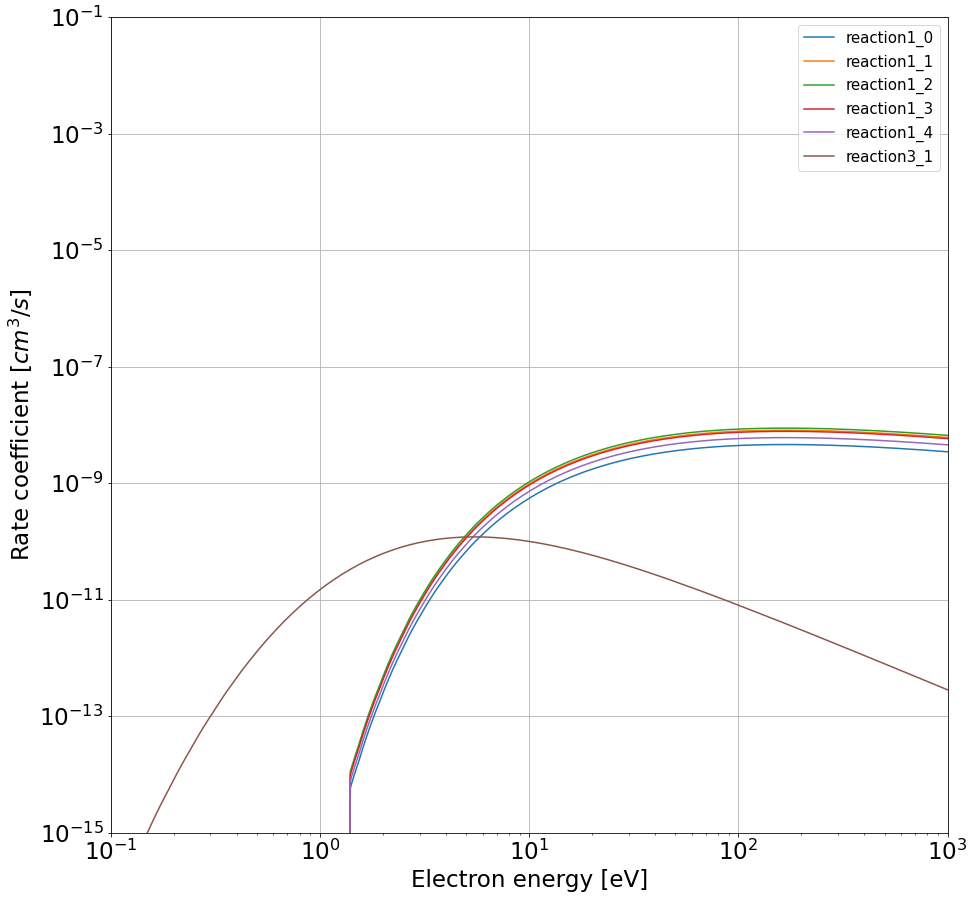

In [10]:
plt.figure(figsize=(15,15))
for reaction_name in reaction1_list:

    plt.plot(Te,np.array(list(map(lambda x:xs.quick_rate_constant_with_analytic_xs(x,reaction_name),Te)))*1e6)

plt.plot(Te,np.array(list(map(lambda x:xs.quick_rate_constant_with_analytic_xs(x,'reaction13'),Te)))*1e6)
plt.plot
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('Electron energy [eV]',fontsize=23)
plt.ylabel('Rate coefficient [$cm^3/s$]',fontsize=23)
plt.xlim(0.1,1000)
plt.ylim(1e-15,1e-1)
plt.grid(1)
plt.legend(reaction_list,loc=1,fontsize=15)
plt.savefig('compare_result/reaction_all.png')

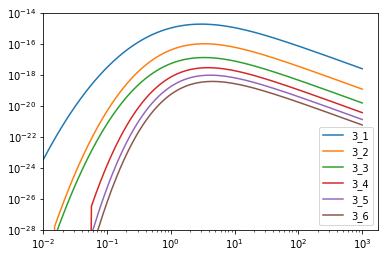

In [32]:
plt.plot(Te,r_list3_1,Te,r_list3_2,Te,r_list3_3,Te,r_list3_4,Te,r_list3_5,Te,r_list3_6)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,)
plt.ylim(1e-28,1e-14)
plt.legend(['3_1','3_2','3_3','3_4','3_5','3_6'])

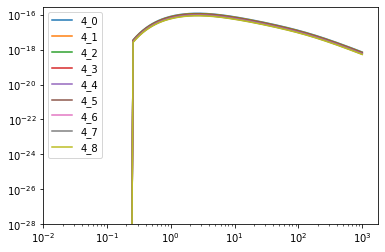

In [33]:
plt.plot(Te,r_list4_0,Te,r_list4_1,Te,r_list4_2,Te,r_list4_3,Te,r_list4_4,Te,r_list4_5,Te,r_list4_6,Te,r_list4_7,Te,r_list4_8)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,)
plt.ylim(1e-28,3e-16)
plt.legend(['4_0','4_1','4_2','4_3','4_4','4_5','4_6','4_7','4_8'])

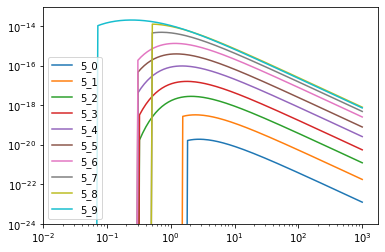

In [34]:
plt.plot(Te,r_list5_0,Te,r_list5_1,Te,r_list5_2,Te,r_list5_3,Te,r_list5_4,Te,r_list5_5,Te,r_list5_6,Te,r_list5_7,Te,r_list5_8,Te,r_list5_9)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,)
plt.ylim(1e-24,1e-13)
plt.legend(['5_0','5_1','5_2','5_3','5_4','5_5','5_6','5_7','5_8','5_9'])

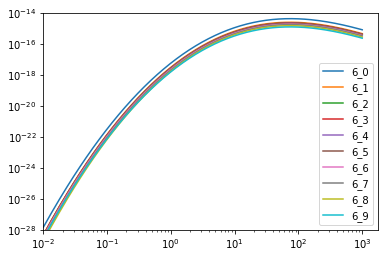

In [35]:
plt.plot(Te,r_list6_0,Te,r_list6_1,Te,r_list6_2,Te,r_list6_3,Te,r_list6_4,Te,r_list6_5,Te,r_list6_6,Te,r_list6_7,Te,r_list6_8,Te,r_list6_9)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,)
plt.ylim(1e-28,1e-14)
plt.legend(['6_0','6_1','6_2','6_3','6_4','6_5','6_6','6_7','6_8','6_9'])

In [69]:
newdict = dict(zip(Te,r_list5_1))
NEW = dict()
for key, value in newdict.items():
    if value > 1e-25:
        NEW[key] = value
        
keys, values = NEW.keys(), NEW.values()

(1e-24, 1e-18)

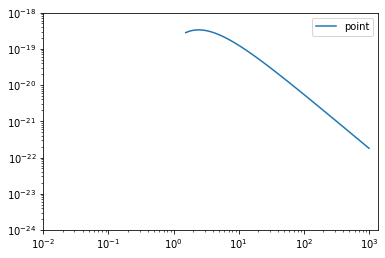

In [264]:
popt, pcov= curve_fit(fitting_function,np.array(list(keys)),np.array(list(values)))

plt.plot(np.array(list(keys)),np.array(list(values)))
#plt.plot(Te,xs_test(Te))
plt.legend(['point','fitted'])
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,)
plt.ylim(1e-24,1e-18)

In [157]:
start = timeit.default_timer()
for i in range(10000):
    f = interp1d(np.array(list(keys)),np.array(list(values)))
    f(3)

end = timeit.default_timer()
print(end-start)

7.303437500000655


In [156]:
start = timeit.default_timer()
for i in range(10000):
    Te = 3
    k1 = np.exp(-3.271396786375e+01+1.353655609057e+01*np.log(Te)-5.739328757388e+00*(np.log(Te))**2+1.563154982022e+00*(np.log(Te))**3-2.877056004391e-01*(np.log(Te))**4+3.482559773737e-02*(np.log(Te))**5-2.631976175590e-03*(np.log(Te))**6+1.119543953861e-04*(np.log(Te))**7-2.039149852002e-06*(np.log(Te))**8)
end = timeit.default_timer()
print(end-start)

1.6869049999995696


In [154]:
new = r_list5_1[r_list5_1 >1e-25]

In [41]:
popt

array([-44.21314413,   2.69329845,  -1.09357811])

In [2]:
import numpy as np
from constants import *
import matplotlib.pyplot as plt
from scipy.integrate import quad
import xs
import time
from numpy.polynomial.chebyshev import chebfit
import pandas as pd
from scipy.optimize import curve_fit